<a href="https://colab.research.google.com/github/ksaverdekar3009/Crop_Recommendation/blob/main/crop_predictor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.metrics import accuracy_score, classification_report, f1_score,mean_absolute_error,r2_score,mean_squared_error
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from imblearn.over_sampling import SMOTE

In [2]:
df = pd.read_csv('/content/drive/MyDrive/SEM-III/Research Component/Crop_data_cleaned_reduced.csv')
df.columns = df.columns.str.strip();df.head()

,Soilcolor,Soil_pH,Potassium,Phosphorus,Zinc,Sulphur,Nitrogen,Annual_Humidity,Annual_Temperature,Annual_Precipitation,WindDirection_10m,Topsoil_Moisture,Cloud_Amount,WindSpeed_2m_Range,Pressure,label
0,brown,5.81,2.87,0.81,0.60,1.17,0.23,10.02,17.33,24.91,3.44,0.73,56.57,6.24,77.03,Barley
1,brown,5.43,2.78,1.06,0.61,1.24,0.23,10.02,17.33,24.91,3.44,0.73,56.57,6.24,77.03,Barley
2,brown,5.41,2.59,0.89,0.88,1.24,0.23,10.02,17.33,24.91,3.44,0.73,56.57,6.24,77.03,Barley
3,red,5.65,2.32,0.65,0.16,1.23,0.23,10.02,17.33,24.91,3.44,0.73,56.57,6.24,77.03,Barley
4,red,5.27,2.50,1.61,0.57,1.13,0.23,10.02,17.33,24.91,3.44,0.73,56.57,6.24,77.03,Barley


In [3]:
df.columns

Index(['Soilcolor', 'Soil_pH', 'Potassium', 'Phosphorus', 'Zinc', 'Sulphur',
       'Nitrogen', 'Annual_Humidity', 'Annual_Temperature',
       'Annual_Precipitation', 'WindDirection_10m', 'Topsoil_Moisture',
       'Cloud_Amount', 'WindSpeed_2m_Range', 'Pressure', 'label'],
      dtype='object')

In [4]:
df["Soilcolor"].unique()

array(['brown', 'red', 'gray', 'black', 'other'], dtype=object)

In [5]:
df["Soil_pH"] = MinMaxScaler().fit_transform(df["Soil_pH"].values.reshape(-1, 1))

In [6]:
# List of nutrients
nutrients = ['Soil_pH', 'Potassium', 'Phosphorus', 'Nitrogen', 'Zinc',
       'Sulphur']
df[nutrients] = MinMaxScaler().fit_transform(df[nutrients])

In [7]:
# List of weather-related features
weather_features = ['Annual_Humidity', 'Annual_Temperature',
       'Annual_Precipitation', 'Topsoil_Moisture','WindDirection_10m', 'Cloud_Amount',
       'WindSpeed_2m_Range', 'Pressure']
df[weather_features] = MinMaxScaler().fit_transform(df[weather_features])

In [8]:
# Label Encoding
le = LabelEncoder()
df['label'] = le.fit_transform(df['label'])
df['Soilcolor'] = le.fit_transform(df['Soilcolor'])

In [9]:
X = df.drop(columns=['label'])
y = df['label']

In [10]:
features = X.columns.tolist();len(features)

15

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [12]:
metrics = {
    "Model": [],
    "Accuracy": [],
    "Mean Absolute Error": [],
}

In [13]:
models = {
    'LR': LogisticRegression(max_iter=1000,
    random_state=42),
    'SVM': SVC(kernel='rbf', random_state=42),
    'RF': RandomForestClassifier(random_state=42),
    'K-NN': KNeighborsClassifier(),
    'XGBoost': XGBClassifier(eval_metric='mlogloss', random_state=42)
}

In [14]:
print("\n=== Model Comparison WITHOUT SMOTE===")
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average="weighted")
    mae = mean_absolute_error(y_test, y_pred)
    print(f"{name} → Accuracy: {acc:.4f}, F1: {f1:.4f}")
    metrics["Model"].append(name)
    metrics["Accuracy"].append(acc)
    metrics["Mean Absolute Error"].append(mae)


=== Model Comparison WITHOUT SMOTE===
LR → Accuracy: 0.4664, F1: 0.4090
SVM → Accuracy: 0.4432, F1: 0.3784
RF → Accuracy: 0.5207, F1: 0.4862
K-NN → Accuracy: 0.4716, F1: 0.4502
XGBoost → Accuracy: 0.5013, F1: 0.4751


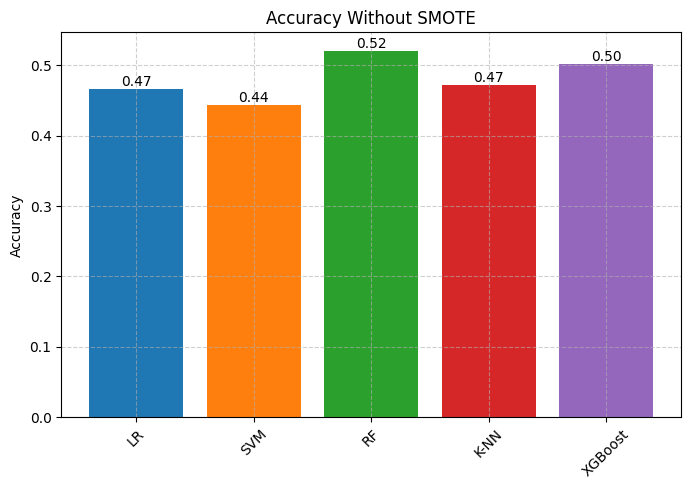

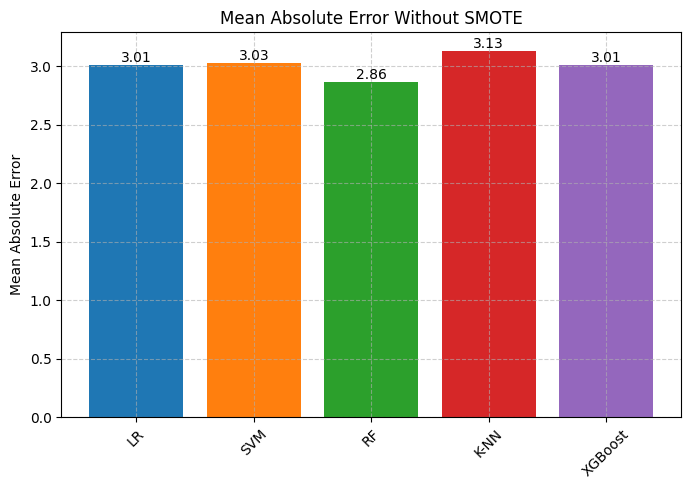

In [15]:
# Convert to DataFrame
metrics_df = pd.DataFrame(metrics)
model_colors = {
    "LR": "#1f77b4",   # blue
    "SVM": "#ff7f0e", # orange
    "RF": "#2ca02c",         # green
    "K-NN": "#d62728",   # red
    "XGBoost": "#9467bd"                # purple
}

# List of metrics to plot
metric_names = ["Accuracy", "Mean Absolute Error"]
for metric in metric_names:
    plt.figure(figsize=(8, 5))
    bars = plt.bar(
        metrics_df["Model"],
        metrics_df[metric],
        color=[model_colors[model] for model in metrics_df["Model"]]
    )
    plt.title(f"{metric} Without SMOTE", fontsize=12)
    plt.ylabel(metric)
    plt.xticks(rotation=45)
    plt.grid(True, linestyle='--', alpha=0.6)

    # Annotate bars with values
    for bar in bars:
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2, height,
                 f"{height:.2f}", ha='center', va='bottom', fontsize=10)

    plt.show()


In [16]:
# Handle Class Imbalance with SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

In [17]:
# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42, stratify=y_resampled)

In [18]:
metrics = {
    "Model": [],
    "Accuracy": [],
    "Mean Absolute Error": [],
}

In [19]:
model_ensemble = {
    'LR': LogisticRegression(max_iter=1000,
    random_state=42),
    'SVM': SVC(kernel='rbf', random_state=42),
    'RF': RandomForestClassifier(random_state=42),
    'K-NN': KNeighborsClassifier(),
    'XGBoost': XGBClassifier(eval_metric='mlogloss', random_state=42)
}

In [20]:
print("\n=== Model Comparison With SMOTE===")
for name, model in model_ensemble.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average="weighted")
    mae = mean_absolute_error(y_test, y_pred)
    std_dev = np.std(y_test - y_pred)
    print(f"{name} → Accuracy: {acc:.4f}, F1: {f1:.4f}")
    metrics["Model"].append(name)
    metrics["Accuracy"].append(acc)
    metrics["Mean Absolute Error"].append(mae)


=== Model Comparison With SMOTE===
LR → Accuracy: 0.4216, F1: 0.3889
SVM → Accuracy: 0.4494, F1: 0.4115
RF → Accuracy: 0.8575, F1: 0.8523
K-NN → Accuracy: 0.8039, F1: 0.7886
XGBoost → Accuracy: 0.8330, F1: 0.8281


In [21]:
rf = RandomForestClassifier(n_estimators=200, random_state=42)
rf.fit(X_train, y_train)

RandomForestClassifier(n_estimators=200, random_state=42)

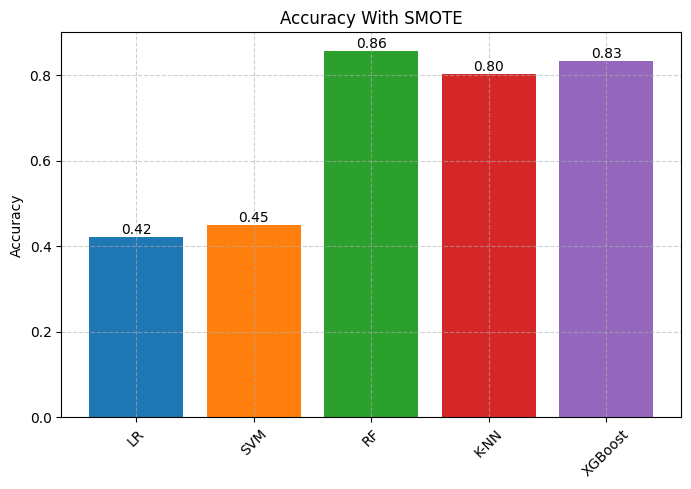

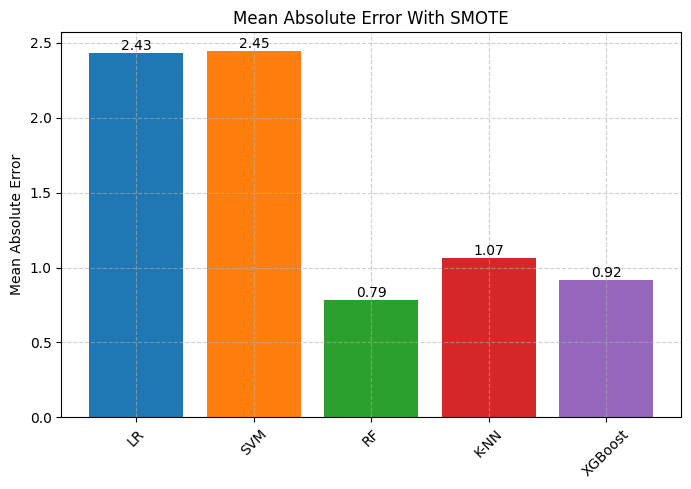

In [22]:
# Convert to DataFrame
metrics_df = pd.DataFrame(metrics)
# Define custom colors for each model
model_colors = {
    "LR": "#1f77b4",   # blue
    "SVM": "#ff7f0e", # orange
    "RF": "#2ca02c",         # green
    "K-NN": "#d62728",   # red
    "XGBoost": "#9467bd"                # purple
}

# List of metrics to plot
metric_names = ["Accuracy", "Mean Absolute Error",]

# Plot each metric separately
for metric in metric_names:
    plt.figure(figsize=(8, 5))
    bars = plt.bar(
        metrics_df["Model"],
        metrics_df[metric],
        color=[model_colors[model] for model in metrics_df["Model"]]
    )
    plt.title(f"{metric} With SMOTE", fontsize=12)
    plt.ylabel(metric)
    plt.xticks(rotation=45)
    plt.grid(True, linestyle='--', alpha=0.6)

    # Annotate bars with values
    for bar in bars:
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2, height,
                 f"{height:.2f}", ha='center', va='bottom', fontsize=10)

    plt.show()


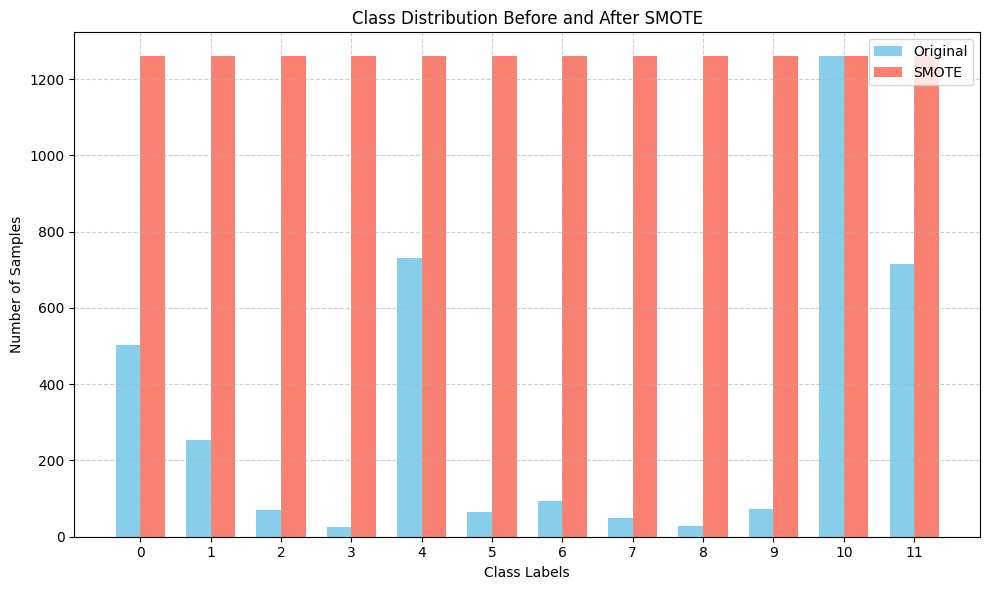

In [23]:
# Count class frequencies
from collections import Counter
original_counts = Counter(y)
resampled_counts = Counter(y_resampled)

# Prepare data for plotting
classes = sorted(original_counts.keys())
original_values = [original_counts[c] for c in classes]
resampled_values = [resampled_counts[c] for c in classes]
x = np.arange(len(classes))
width = 0.35

# Plot side-by-side bar chart
plt.figure(figsize=(10, 6))
plt.bar(x - width/2, original_values, width, label='Original', color='skyblue')
plt.bar(x + width/2, resampled_values, width, label='SMOTE', color='salmon')

# Formatting
plt.xlabel('Class Labels')
plt.ylabel('Number of Samples')
plt.title('Class Distribution Before and After SMOTE')
plt.xticks(x, classes)
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()